In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
Hrt = pd.read_csv('heart.csv')

In [4]:
Hrt.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
Hrt.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
Hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
Hrt.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [8]:
Hrt.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
Hrt.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [10]:
Hrt.value_counts()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease
28   M    ATA            130        132          0          LVH         185    N               0.0      Up        0               1
58   M    ASY            128        216          0          LVH         131    Y               2.2      Flat      1               1
                         130        0            0          ST          100    Y               1.0      Flat      1               1
                                    263          0          Normal      140    Y               2.0      Flat      1               1
                         132        458          1          Normal      69     N               1.0      Down      0               1
                                                                                                                                 ..
50   M    ASY            150        215          0          Normal      140    Y               0.0      Up        0               1
                                    243          0          LVH         128    N               2.6      Flat      1               1
          ATA            120        168          0          Normal      160    N               0.0      Up        0               1
                         140        216          0          Normal      170    N               0.0      Up        0               1
77   M    ASY            125        304          0          LVH         162    Y               0.0      Up        1               1
Name: count, Length: 918, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x79a4edb7b410>,
 'caps': [<matplotlib.lines.Line2D at 0x79a4edb8c950>,
 'boxes': [<matplotlib.lines.Line2D at 0x79a4edb7a890>],
 'medians': [<matplotlib.lines.Line2D at 0x79a4edb8ded0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79a4edb8e850>],
 'means': []}

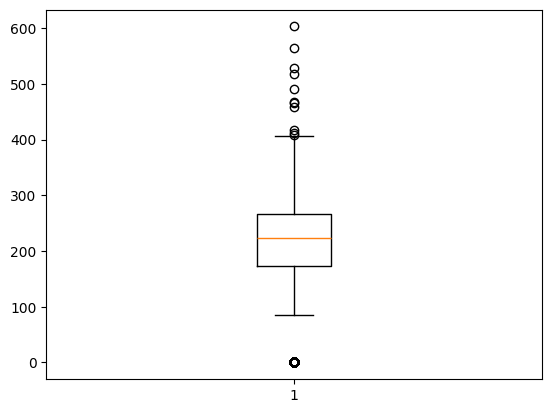

In [11]:
plt.boxplot(Hrt["Cholesterol"])

{'whiskers': [<matplotlib.lines.Line2D at 0x79a4edc31cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x79a4edc32ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79a4edc31490>],
 'medians': [<matplotlib.lines.Line2D at 0x79a4edc403d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79a4edc40d50>],
 'means': []}

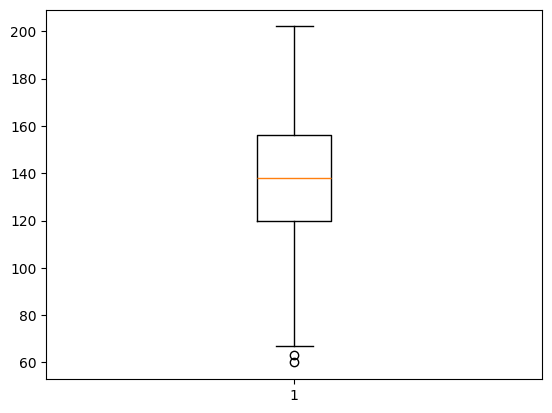

In [12]:
plt.boxplot(Hrt["MaxHR"])

In [13]:
# Pie chart on Sex
px.pie(Hrt,names='Sex',title='Sex')

(array([ 12.,  37.,  86., 104., 148., 201., 175., 101.,  39.,  15.]),
 array([28. , 32.9, 37.8, 42.7, 47.6, 52.5, 57.4, 62.3, 67.2, 72.1, 77. ]),
 <BarContainer object of 10 artists>)

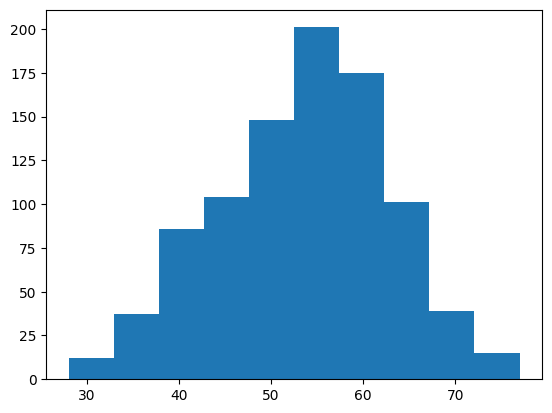

In [14]:
plt.hist(Hrt["Age"])

<Axes: xlabel='ChestPainType', ylabel='Count'>

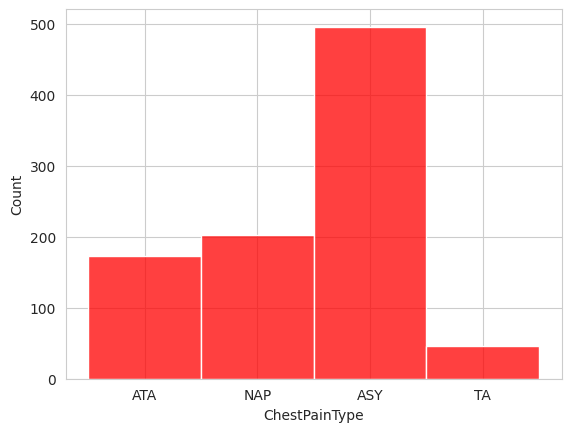

In [15]:
sns.set_style('whitegrid')
sns.histplot(Hrt['ChestPainType'],color ='red', bins = 10)

In [16]:
fig = px.pie(Hrt, names='Sex')
fig.show()

In [17]:
# Converting male to 0 & Female to 1
Hrt["Sex"] = Hrt["Sex"].map({'M': 0 ,'F': 1})

In [18]:
Hrt["ChestPainType"].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [19]:
# Converting " ASY, NAP, ATA, TA" TO "0,1,2,3"
Hrt["ChestPainType"] = Hrt["ChestPainType"].map({'ASY': 0 ,'NAP': 1, 'ATA':2,'TA':3})

In [20]:
Hrt["ExerciseAngina"] = Hrt["ExerciseAngina"].map({'N': 0 ,'Y': 1})

In [21]:
Hrt["RestingECG"] = Hrt["RestingECG"].map({'Normal': 0 ,'ST': 1, 'LVH':2})

In [22]:
Hrt["ST_Slope"] = Hrt["ST_Slope"].map({'Flat': 0 ,'Up': 1,'Down':2})

In [23]:
Hrt

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,1,0
1,49,1,1,160,180,0,0,156,0,1.0,0,1
2,37,0,2,130,283,0,1,98,0,0.0,1,0
3,48,1,0,138,214,0,0,108,1,1.5,0,1
4,54,0,1,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,0,1
914,68,0,0,144,193,1,0,141,0,3.4,0,1
915,57,0,0,130,131,0,0,115,1,1.2,0,1
916,57,1,2,130,236,0,2,174,0,0.0,0,1


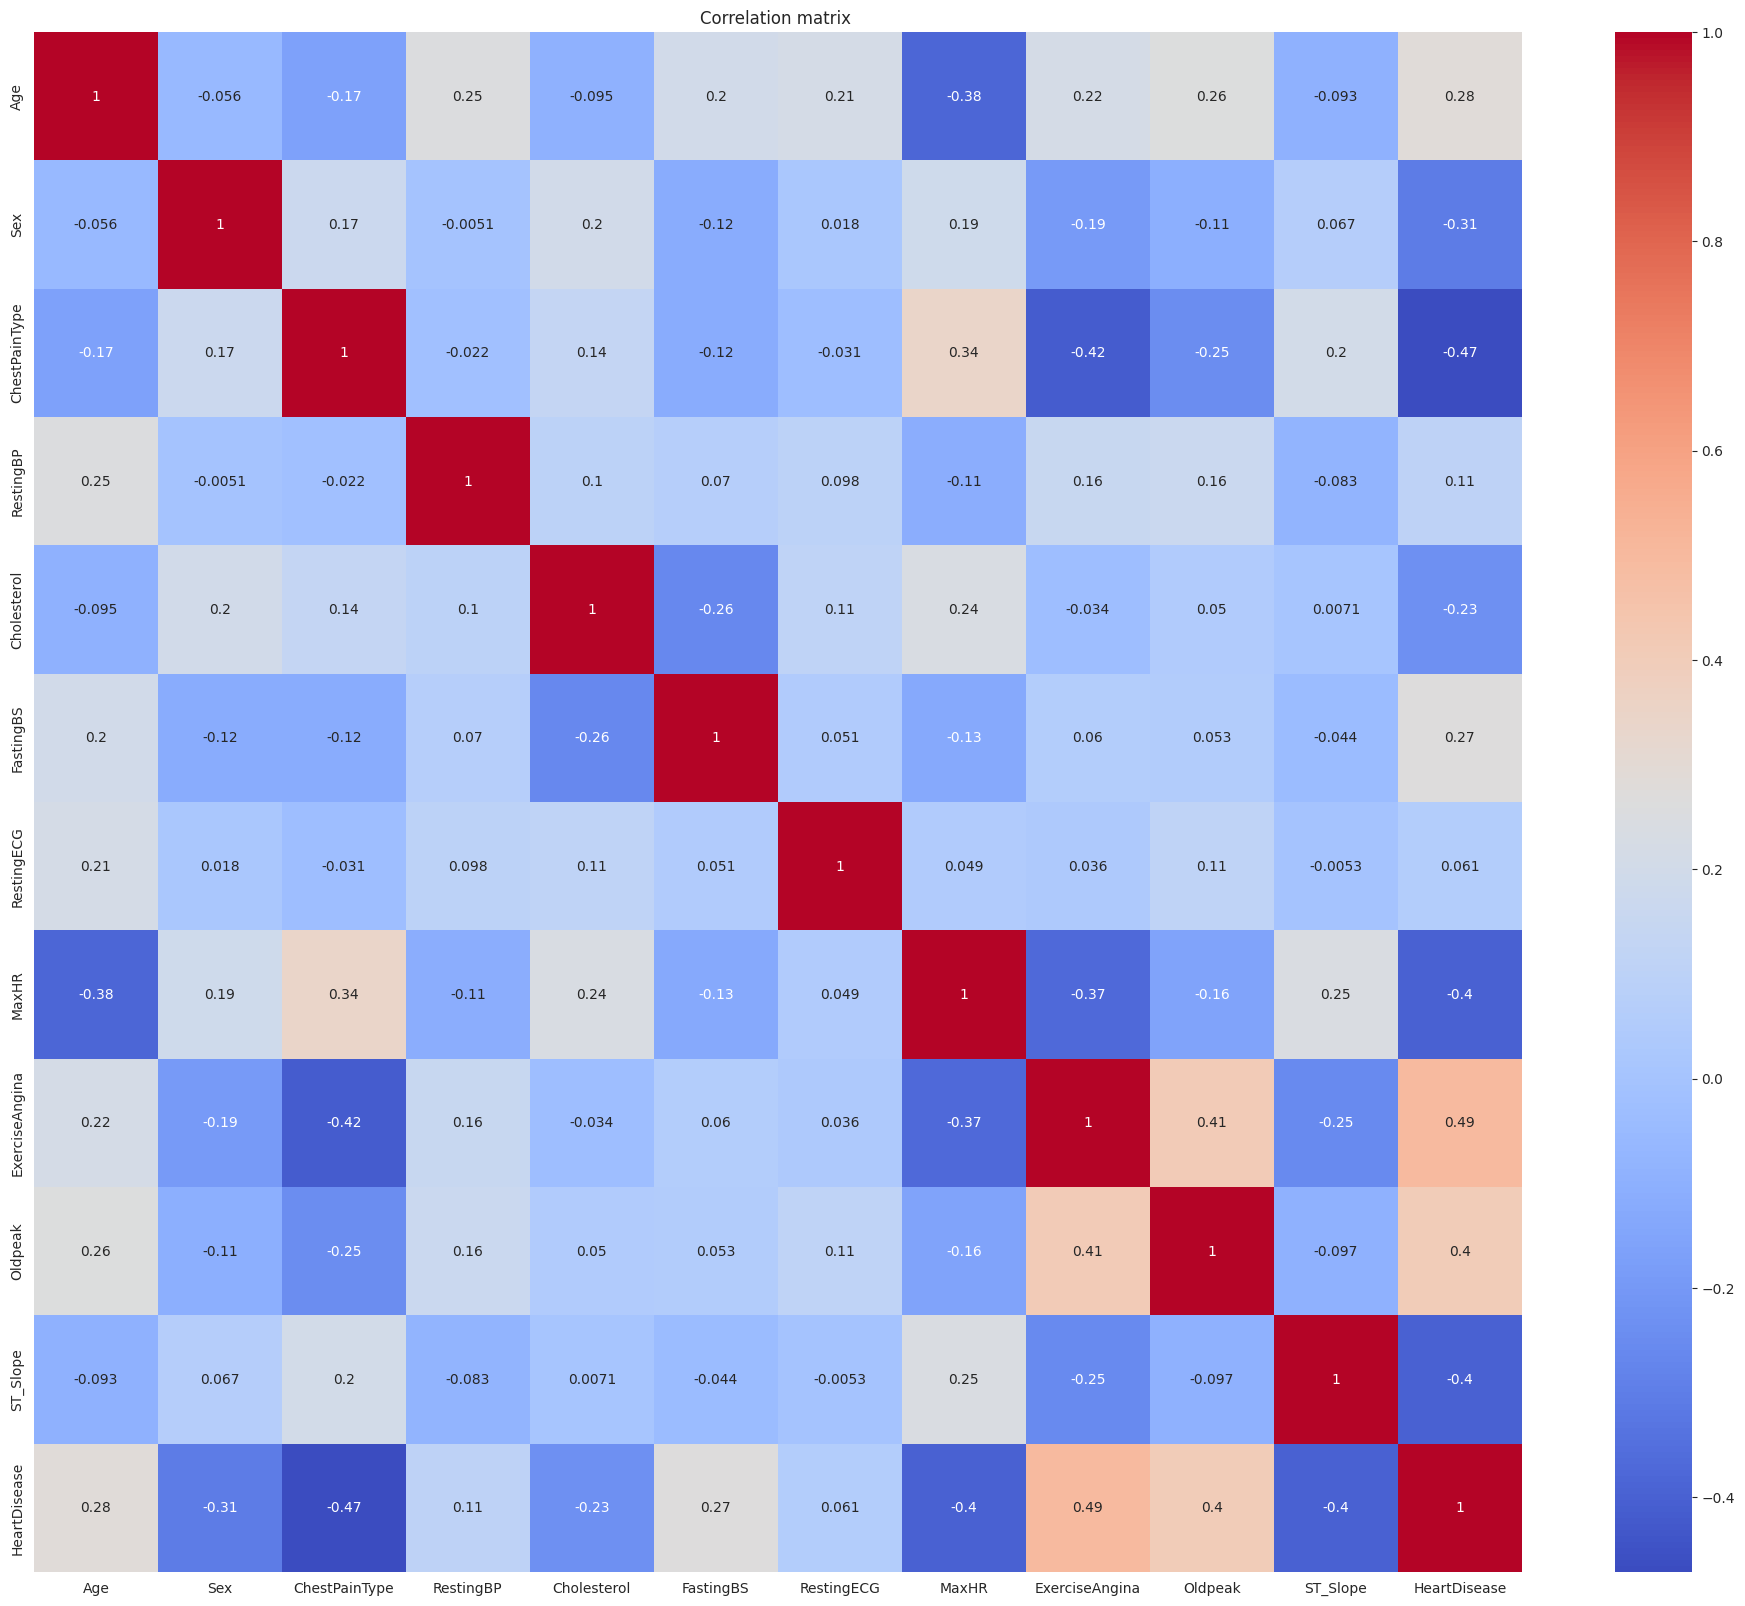

In [24]:
corr = Hrt.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation matrix ")
plt.show()

In [25]:
threshold = 0.01
high_corr_features = corr.index[abs(corr["HeartDisease"]) > threshold].tolist()
high_corr_features.remove("HeartDisease")
print("Selected features based on correlation with target:")
print(high_corr_features)

X_selected = Hrt[high_corr_features]
y = Hrt["HeartDisease"]

Selected features based on correlation with target:
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [26]:
X_selected

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,2,140,289,0,0,172,0,0.0,1
1,49,1,1,160,180,0,0,156,0,1.0,0
2,37,0,2,130,283,0,1,98,0,0.0,1
3,48,1,0,138,214,0,0,108,1,1.5,0
4,54,0,1,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,0
914,68,0,0,144,193,1,0,141,0,3.4,0
915,57,0,0,130,131,0,0,115,1,1.2,0
916,57,1,2,130,236,0,2,174,0,0.0,0


In [27]:
X_selected_train,X_selected_test,y_train,y_test = train_test_split(X_selected,y, test_size = 0.3 , random_state = 42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_selected_train)
X_test_scaled = scaler.transform(X_selected_test)

In [29]:
# Logistic Regression
model_L = LogisticRegression()
model_L.fit(X_train_scaled , y_train)

LogisticRegression()

In [30]:
model_L.score(X_train_scaled,y_train)

0.8566978193146417

In [31]:
y_pred= model_L.predict(X_test_scaled)

In [32]:
accuracy_score(y_test , y_pred)

0.855072463768116

In [33]:
print(classification_report (y_test , y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       112
           1       0.92      0.82      0.87       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276



In [35]:
# Define the parameter grid
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Create a GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=7)

# Fit the model
grid.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid.best_params_)
print("Best cross-validation score: ", grid.best_score_)

# Evaluate the model on the test set
print("Test set score: ", grid.score(X_test_scaled, y_test))

Fitting 7 folds for each of 16 candidates, totalling 112 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

In [36]:
print("Test set score: ", grid.score(X_test_scaled, y_test))

Test set score:  0.8876811594202898


In [37]:
y_pred2 = grid.predict(X_test_scaled)

In [38]:
accuracy_score(y_test , y_pred2)

0.8876811594202898

In [39]:
accuracy=accuracy_score(y_pred, y_pred)
conf_matrix=confusion_matrix(y_test, y_pred)
class_report=classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 1.0000

Confusion Matrix:
[[101  11]
 [ 29 135]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       112
           1       0.92      0.82      0.87       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276



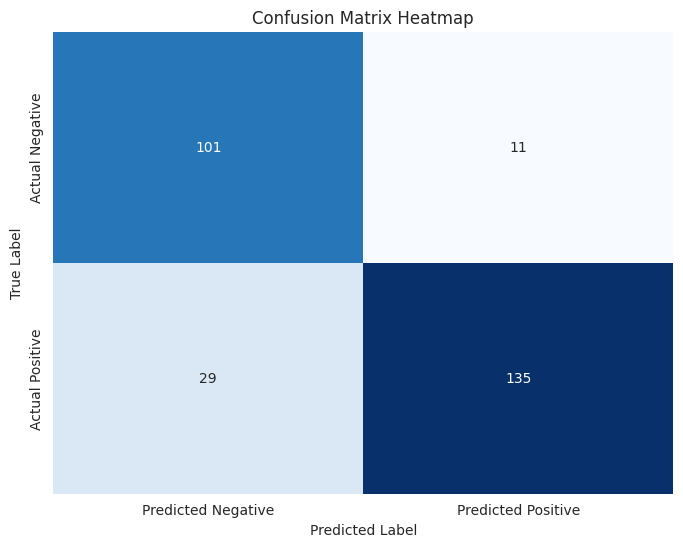

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# KNeighborsClassifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

In [42]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [43]:
y_pred_knn = knn.predict(X_test_scaled)

In [44]:
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 87.68%


In [45]:
classification_report(y_test, y_pred_knn)

'              precision    recall  f1-score   support\n\n           0       0.82      0.88      0.85       112\n           1       0.92      0.87      0.89       164\n\n    accuracy                           0.88       276\n   macro avg       0.87      0.88      0.87       276\nweighted avg       0.88      0.88      0.88       276\n'

# RandomForestClassifier

In [46]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [47]:
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_pred4 = rf_classifier.predict(X_test_scaled)

In [49]:
accuracy = accuracy_score(y_test, y_pred4)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 88.77%


# Confusion Matrix

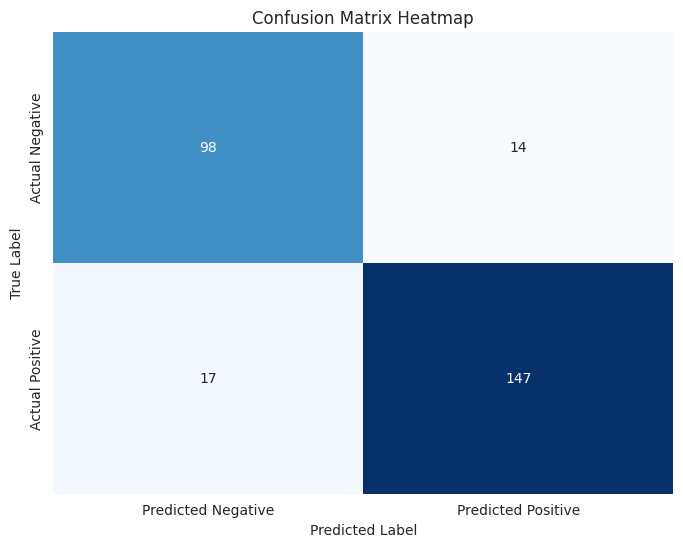

In [50]:
cm1 = confusion_matrix(y_test, y_pred4)

# Visualizing the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

Selecting Best Model

In [54]:
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred),
    "SVC": accuracy_score(y_test, y_pred2),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Random Forest": accuracy_score(y_test, y_pred4)
}


best_model = max(models, key=models.get)
best_accuracy = models[best_model]

print(f"\nBest Model: {best_model}")
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")



Best Model: SVC
Best Accuracy: 88.77%
